# Unsupervised Learning using Scikit Learn 


![](https://i.imgur.com/eyfi64y.png)

In [1]:
!pip install pandas-profiling 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.9.0 which is incompatible.


## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

## Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html


Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation

We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
iris_df = sns.load_dataset('iris')

In [4]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

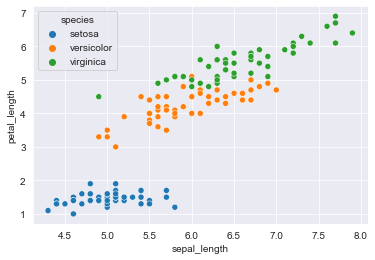

In [8]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

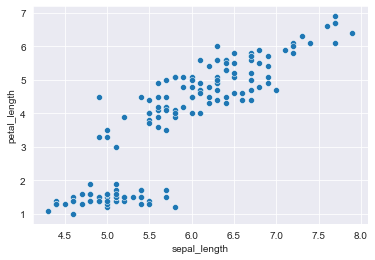

In [13]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length')

In [22]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [23]:
X=iris_df[numeric_cols]

In [24]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance (spread of objects around the centroid) of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

In [17]:
from sklearn.cluster import KMeans

In [25]:
model = KMeans(n_clusters=3, random_state=42)

In [26]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [27]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

We can now classify points using the model.

In [29]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

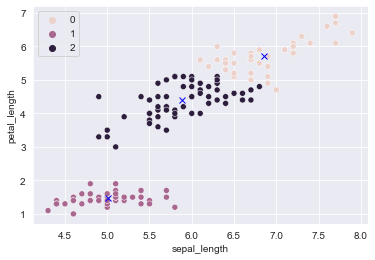

In [35]:
sns.scatterplot(X, x='sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [37]:
model.inertia_

78.8556658259773

In [38]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [39]:
preds = model.predict(X)
preds

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

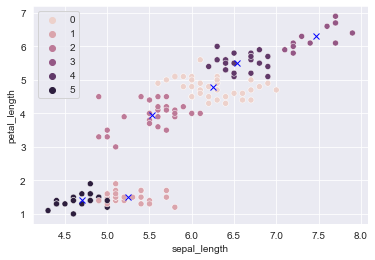

In [43]:
sns.scatterplot(X, x='sepal_length', y='petal_length', hue=preds)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

In [44]:
model.cluster_centers_

array([[6.24722222, 2.84722222, 4.775     , 1.575     ],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ]])

In [46]:
model.cluster_centers_[:,2]

array([4.775     , 1.5       , 3.96071429, 6.3       , 5.50833333,
       1.41363636])

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

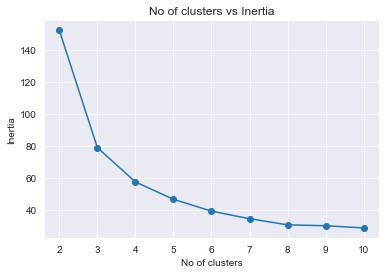

In [49]:
options=range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No of clusters vs Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia');

The above plot is called **ELBOW CURVE** , and can help you pick the number of clusters beyond which the reduction in inertia decreases sharply.

### Mini-batch K-means


Mini-batch K-means is a variation of the traditional K-means clustering algorithm that updates the cluster centroids using mini-batches of the data, rather than the entire dataset, in each iteration. This can significantly speed up the convergence of the algorithm, especially for large datasets.

In Mini-Batch K-means, we don't use the same mini-batch to update the centroids. Instead, for each iteration, a new random mini-batch is selected from the dataset, and this mini-batch is used to update the centroids.

Here's a step-by-step explanation:

1. **Initialization**: Initialize the cluster centroids randomly.

2. **Mini-Batch Selection**: Randomly select a subset (mini-batch) of the data.

3. **Assign Points to Nearest Centroids**: For each point in the mini-batch, assign it to the nearest centroid using the Euclidean distance.

4. **Update Centroids**: Update the centroids using the mean of the points assigned to each centroid.

5. **Repeat**: Repeat steps 2-4 for a fixed number of iterations or until convergence criteria are met.

6. **Finalization**: After completing a certain number of iterations or reaching convergence, the final centroids represent the cluster centers.

In each iteration, a different mini-batch is randomly selected from the dataset, which introduces stochasticity into the algorithm. This stochasticity helps Mini-Batch K-means converge faster and is particularly useful when dealing with large datasets that cannot fit into memory.


In [53]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson6


'https://jovian.com/pragyakiran03041996/lesson6'

### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI



1. **Density-Based Clustering**:
   - DBSCAN is a density-based clustering algorithm, meaning it groups together points that are closely packed in the feature space.
   - It doesn't require the user to specify the number of clusters beforehand, unlike k-means.

2. **Core Points, Border Points, and Noise**:
   - DBSCAN identifies three types of points in the dataset:
     - Core Points: Points with a specified minimum number of neighbors (minPts) within a given radius (epsilon).
     - Border Points: Points that are within the neighborhood (epsilon radius) of a core point but don't have enough neighbors to be considered core points themselves.
     - Noise Points: Points that are neither core nor border points.
   
3. **Algorithm Steps**:
   - Randomly select a point from the dataset.
   - Determine if the selected point is a core point, a border point, or noise based on the minPts and epsilon parameters.
   - If the point is a core point, recursively expand the cluster by adding all reachable points to the same cluster.
   - Repeat the process for all points in the dataset until all points have been assigned to a cluster or identified as noise.

4. **Cluster Formation**:
   - DBSCAN forms clusters by connecting core points to their directly reachable neighbors, including other core points and border points.
   - Border points may belong to multiple clusters if they are reachable from multiple core points.

5. **Key Parameters**:
   - `epsilon`: The maximum radius of the neighborhood around a point. Points within this radius are considered neighbors.
   - `minPts`: The minimum number of points required to form a cluster. Points with at least `minPts` neighbors within the epsilon radius are considered core points.

6. **Advantages**:
   - Robust to outliers and able to handle clusters of arbitrary shapes.
   - Doesn't require specifying the number of clusters beforehand.

7. **Disadvantages**:
   - Sensitive to the choice of epsilon and minPts parameters.
   - May struggle with datasets of varying densities or high-dimensional data.

Overall, DBSCAN is a versatile clustering algorithm suitable for various types of datasets, particularly those with irregular cluster shapes and noise. However, proper parameter tuning and understanding of the dataset's characteristics are crucial for its effective application.

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
model = DBSCAN(eps=1.1, min_samples=4)

In [57]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In [58]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

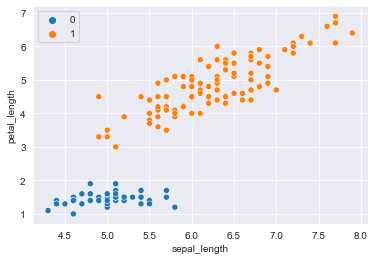

In [59]:
sns.scatterplot(X, x='sepal_length', y='petal_length', hue=model.labels_)

In [62]:
dir(model)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'algorithm',
 'components_',
 'core_sample_indices_',
 'eps',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'get_metadata_routin

In [63]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

NOTE: Kmeans can be optimal for the introduction of new point, you just have to check distance from the centroid, but DBSCAN would require running the entire scan again to include one new point in the cluster 

Here's how the results of DBSCAN and K Means differ:

KMeans -- uses the concept of cluster center and the distance between the cluster center and the point 
DBSCAN -- uses nearness between the points to create a cluster
<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

Here are the advantages and disadvantages of DBSCAN and K-means clustering algorithms:

**DBSCAN:**

Advantages:
- Can find arbitrarily shaped clusters and is robust to outliers.
- Does not require the number of clusters to be specified beforehand.
- Automatically detects noise points as outliers.
- Suitable for datasets with varying densities.

Disadvantages:
- Sensitive to the choice of epsilon and minPts parameters.
- May struggle with datasets of varying densities or high-dimensional data.
- Computationally expensive for large datasets or high-dimensional data.
- Not suitable for clusters with varying densities, as it assumes a uniform density within clusters.

**K-means:**

Advantages:
- Simple and easy to implement.
- Efficient for large datasets and high-dimensional data.
- Typically faster than density-based clustering algorithms like DBSCAN.
- Can perform well on datasets with well-separated, spherical clusters.
- Results are easy to interpret and visualize.

Disadvantages:
- Requires the number of clusters to be specified beforehand.
- Sensitive to the choice of initial cluster centroids, which can affect the final results.
- Assumes clusters are spherical and of equal size, which may not be appropriate for all datasets.
- Prone to converge to local optima, especially when clusters have different sizes, densities, or non-linear shapes.
- Not robust to outliers, as outliers can significantly affect the positions of cluster centroids.

### Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. **Initialization**: Treat each data point as a single cluster.

2. **Distance Matrix**: Calculate the pairwise distance (or dissimilarity) between each pair of clusters.

3. **Merge Clusters**: Find the closest pair of clusters based on the distance matrix. Merge these clusters into a single cluster.

4. **Update Distance Matrix**:Recalculate the pairwise distances between the newly formed cluster and all other clusters.

5. **Repeat**: Repeat steps 3-4 until all data points are in a single cluster or until a predefined number of clusters is reached.

6. **Dendrogram**: Visualize the hierarchical clustering process using a dendrogram, which shows the merging of clusters at each step.

7. **Cutting the Dendrogram**:
   - Based on the dendrogram, cut it horizontally to obtain the desired number of clusters.
   - The height at which the dendrogram is cut determines the number of clusters obtained.

Advantages of hierarchical clustering:
- Does not require specifying the number of clusters beforehand.
- Provides a hierarchical structure, which can be useful for understanding relationships between clusters (for eg type of species)
- Suitable for datasets with non-spherical or complex cluster shapes.

Disadvantages of hierarchical clustering:
- Computationally expensive, especially for large datasets.
- Can be sensitive to noise and outliers.
- May not perform well on high-dimensional data due to the curse of dimensionality.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson6" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson6


'https://jovian.com/pragyakiran03041996/lesson6'

## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions


### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

In simple words,PCA can be understood in terms of bases of vectors as a transformation of the original data into a new basis set (principal components) that captures the most important directions of variation in the data. PCA achieves dimensionality reduction by retaining only the first few principal components that explain the most variance in the data. 


Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://www.researchgate.net/publication/345602552/figure/fig1/AS:1028064637104131@1622121118891/PCA-Example-3D-to-2D.png" width="640">


WORKING:
Imagine if you have a few points in the $x_1$ and $x_2$ plane, and you obtain it by shifting the points by subtraction the mean in the $x_1$ and $x_2$ direction. Now for the new points, we can draw a candidate line on which we can project our points. For the projected points, one then finds the distance $d_i$ from the origin such that $d_1^2 + d_2^2 + ... $ is the maximum. This tell that more spread has been taking into account. 

If for the above cartoon, one took the line that was perpendicular to it, then the projection (see the attached figure) wouldnt lead to a good candidate line for PCA as distance from origin would be very little

<img src="PCA.jpg" width="440">




In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson6" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson6


'https://jovian.com/pragyakiran03041996/lesson6'

In [69]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components = 2)

In [72]:
pca.fit(X)

PCA(n_components=2)

In [77]:
transformed = pca.transform(X)
transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [80]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

<AxesSubplot:>

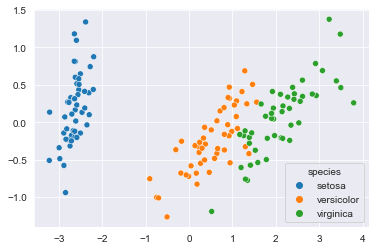

In [78]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.



In [83]:
0.36138659**2 + 0.08452251**2  + 0.85667061** 2+  0.3582892**2

1.0000000070029402

In [84]:
#these are from the DBSCAN (DBSCAN clustering gave 2 cluster, lets look how they look at )
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<AxesSubplot:>

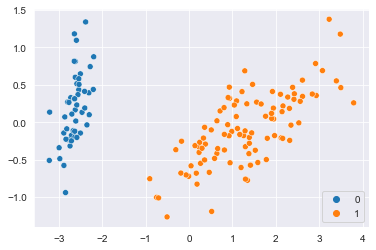

In [85]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=model.labels_)

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

Though PCA has limitiations
- Loss of Interpretability: PCA reduces the dimensionality of data by creating linear combinations of original features, making it difficult to interpret the meaning of each principal component.
- Assumes Linearity: PCA assumes that the underlying relationships in the data are linear, which may not hold true for all datasets.
- Sensitivity to Scale: PCA is sensitive to the scale of the features, and standardization is often required before applying PCA.
- Outliers: PCA can be influenced by outliers, potentially leading to skewed results.
- Nonlinear Relationships: PCA cannot capture nonlinear relationships in the data and may not be suitable for datasets with complex nonlinear structures.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

**SUMMARY
t-SNE works by first computing pairwise similarities between data points in high-dimensional space, constructing probability distributions based on these similarities, and then optimizing the positions of data points in a lower-dimensional space to preserve the local structure of the data. The result is a visual representation of the data that reveals clusters and patterns.**

It finds a way to project the data into low dimensional space, so that the clustering in high dimensional space is preserved.  


Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://i.imgur.com/kpD7d2a.png" width="640">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [88]:
from sklearn.manifold import TSNE

In [89]:
tsne = TSNE(n_components=2)

In [92]:
transformed = tsne.fit_transform(X)

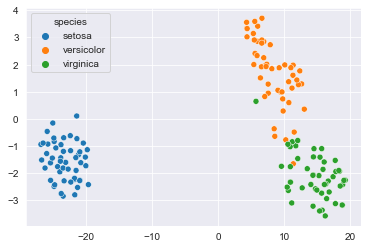

In [93]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);


1. Unsupervised learning: Machine learning approach where the algorithm learns patterns from unlabeled data without explicit supervision.

2. ML algorithm landscape: It encompasses a range of algorithms categorized into supervised, unsupervised, and reinforcement learning.

3. Clustering: Technique for grouping similar data points together based on certain criteria.

4. Real-world clustering apps: Market segmentation, image segmentation, anomaly detection, etc.

5. K-Means clustering: Partitioning method for clustering data into K clusters.

6. Centroids: Representative points in a cluster, typically the mean of all points in the cluster.

7. K-Means algorithm: Iteratively assigns data points to the nearest centroid and updates centroids until convergence.

8. Goodness of fit: Measure of how well a model fits the data it was trained on.

9. model.inertia_: Attribute in scikit-learn's K-Means model containing the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

10. Elbow plot: Graphical method for selecting the optimal number of clusters in K-Means by observing the bend in the plot. Look into the plot between number of cluster and inertia

11. Mini Batch K-Means: Variation of K-Means that processes subsets of the data at a time for faster convergence.

12. DBSCAN: Density-based clustering algorithm that groups together closely packed points based on minimum sample and epsilon(radius)

13. Hierarchical clustering: Method for creating clusters in a tree-like structure. Common approaches include agglomerative (start with each point as individual cluster and then combine together points based on the distance) and divisive clustering (all points are taken as one big cluster and then we keep on dividing into small clusters of some points)

14. Dimensionality reduction: Technique for reducing the number of features in a dataset while preserving its important characteristics.

15. Applications of dimensionality reduction: Visualization, noise reduction, speeding up learning algorithms, etc.

16. PCA: Principal Component Analysis, a popular dimensionality reduction technique that transforms data into a new coordinate system to maximize variance.

17. Manifold learning: Technique for nonlinear dimensionality reduction that preserves the underlying structure of the data.

18. t-SNE: t-distributed Stochastic Neighbor Embedding, a method for visualizing high-dimensional data by capturing local and global structure.

In [94]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson6" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson6


'https://jovian.com/pragyakiran03041996/lesson6'

### t-SNE mathematics explained
t-SNE, or t-distributed Stochastic Neighbor Embedding, is a dimensionality reduction technique primarily used for visualizing high-dimensional data in lower-dimensional spaces, typically 2D or 3D. The main idea behind t-SNE is to map high-dimensional data points into a lower-dimensional space while preserving the local structure of the data as much as possible. It does so by modeling the similarity between pairs of data points in both the high-dimensional and low-dimensional spaces and minimizing the difference between the two.

Here's a simplified explanation of the mathematics behind t-SNE:

1. **Define Similarity:** First, t-SNE computes pairwise similarities between data points in the high-dimensional space. It measures similarity using a Gaussian kernel:

   $p_{j|i} = \frac{ \exp\left(-\frac{||x_i - x_j||^2}{2\sigma_i^2}\right)}{\sum_{k\neq i}\exp\left(-\frac{||x_i - x_k||^2}{2\sigma_i^2}\right)}$

   where $ p_{j|i} $ is the conditional probability that point $ x_i $ would pick $ x_j $ as its neighbor, given a Gaussian distribution centered at $ x_i $. The bandwidth parameter $ \sigma_i $ controls the variance of the Gaussian distribution for each data point $ x_i $ 
   
   In nutshell, $ \sigma_i $ controls how many points do we want within first two standard deviation. It is a 
   dynamic variable based on which point we are looking it, if for the point $ x_i $, the neighbours are bit 
   scattered, we will need a larger $ \sigma_i $ to put all the points within the first two standard deviation,
   and vice versa.
   

2. **Symmetrize Similarity:** To obtain a symmetric similarity matrix, the average of $ p_{j|i} $ and $ p_{i|j} $ is computed:

   $ p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n} $

3. **Define Low-dimensional Similarity:** Next, t-SNE defines a similar distribution in the low-dimensional space, $ q_{ij} $, using a Student's t-distribution with one degree of freedom:

   $ q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l}(1 + ||y_k - y_l||^2)^{-1}} $

   where $ y_i $ and $ y_j $ are the corresponding points in the low-dimensional space.
   
   **REASON** why do we need t-distribution in the first place--> In t-SNE (t-distributed Stochastic Neighbor Embedding), the use of the t-distribution instead of a Gaussian distribution in lower dimensions is primarily motivated by the desire to address the crowding problem, also known as the **crowding-out effect**. This effect refers to the phenomenon where points that are far apart in high-dimensional space may appear much closer together in the low-dimensional embedding, causing the embedding to become crowded. For eg, you have moderately distance point in high dimensional space, now when you try to fit it to lower dimensional space, they will become densely packed together, leading to overcrowding in that region.
   
   **The t-distribution** has heavier tails compared to the Gaussian distribution. This means that it assigns more probability mass to points that are far apart in the high-dimensional space, effectively avoiding the crowding-out effect. The heavier tails of the t-distribution allow it to better capture the local structure of the data, especially in regions of high density.



4. **Minimize the Difference:** t-SNE minimizes the difference between the two distributions $ p_{ij} $ and $ q_{ij} $ using a cost function. It minimizes the Kullback-Leibler divergence between the two distributions with respect to the locations of the points in the low-dimensional space:

    $C = KL(P||Q) = \sum_i \sum_j p_{ij} \log\left(\frac{p_{ij}}{q_{ij}}\right) $

   This cost function penalizes large differences in the distributions $ p_{ij} $ and $ q_{ij} $, effectively preserving local structure.

5. **Optimization:** t-SNE typically uses gradient descent to optimize the positions of points in the low-dimensional space, minimizing the cost function $ C $.

By minimizing the cost function, t-SNE effectively reduces the dimensionality of the data while preserving local structure, making it suitable for visualization tasks. However, it's important to note that t-SNE is computationally expensive and may not always preserve global structures accurately. Additionally, it requires careful tuning of hyperparameters such as the bandwidth parameter $ \sigma_i $ and the perplexity parameter.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>